# This is an examples of how to use the rb_vfit program


## Written By: Rongmon Bordoloi
Feb 22, 2019
Tested on Python 3.7


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from importlib import reload

from rbvfit import rb_vfit as r
reload(r)

# Example USE

The following code snippets show how to call and use the rb_vfit object to create a Voigt profile 

## Initiate a line object

In [ ]:
line = r.model()

## Set up the species, and redshift and several clumps

In [ ]:
lambda_rest=1215.67
zabs=0
line.addline(lambda_rest, z=zabs)
line.addline(lambda_rest, z=zabs)


## Set up a wavelength grid 
Using 0.01 Angstrom/ pixel similar to COS spectra

In [ ]:
wave=np.arange(1208.,1220.,0.01)

## Set up the model by defining N, b, and v

In [ ]:

N=np.array([14.,13.])
b=np.array([20.,21.])
v=np.array([10.,-50.])
theta=np.concatenate((N,b,v))


## Now create Voigt Profile

In [ ]:
flx, components = r.model_profile(theta, wave, line)

## Plot the generated Absorption Profile

In [ ]:
plt.step(wave,flx)

#---------------------------------------------------------

# The next example is a wrapper to do everything in one go

# For end users: USE THE FOLLOWING

In [ ]:
from rbvfit import model as m
reload(m)

# First initialize the model you want to use
e.g. set up the redshifts and instrument settings and transition wavelengths first

In [ ]:
wave=np.arange(1208.,1220.,0.01)
# We are setting up 3 clumps at z = 0
#  For Lya absorption
# . With default 6.5 pixel FWHM of HST/COS and Gaussian convolution
zabs=np.array([0.])
lambda_rest = [1215.67]# * np.ones((len(zabs),))

nclump=3
ntransition=1

s=m.create_voigt(zabs,lambda_rest,nclump)

# Now we are all set to use the object to create voigt profiles for different settings

In [ ]:
N=np.array([14.,13., 16.])
b=np.array([20.,21.,29.])
v=np.array([10.,-100.,-200.])
theta=np.concatenate((N,b,v))


outflux= s.model_flux(theta,wave)


In [ ]:
plt.step(wave,outflux)

In [ ]:
zlist=np.array([0.3,1.3,1.2])

In [ ]:
zlist=np.append(np.repeat(z[0],3),zlist[1:])


In [ ]:
zlist

In [ ]:
lam_rest=np.array([2796.3,2803.5,1215.67])
ncl=3
nt=2

In [ ]:
lam_restlist=[]
for i in range(0,nt):
    lam_restlist=np.append(lam_restlist,np.repeat(lam_rest[i],ncl))
lam_restlist=np.append(lam_restlist,lam_rest[nt:])

In [ ]:
lam_restlist


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from importlib import reload
import ipdb
from rbvfit import rb_vfit as r
from rbvfit import rb_setline as rt
reload(r)

<module 'rbvfit.rb_vfit' from '/Users/bordoloi/WORK/python/rbvfit/src/rbvfit/rb_vfit.py'>

In [56]:



def set_one_absorber(N,b,lam_rest):
    zabs=0
    line = r.model()
    N=np.array(N)
    b=np.array(b)
    v=np.array([0.])
    
    line.addline(lam_rest, z=zabs)
    wave=np.arange(lam_rest-10.,lam_rest+10.,0.05)
    #ipdb.set_trace()
    theta=np.array([N,b,v])#np.concatenate((N,b,v))
    flx, components = r.model_profile(theta, wave, line)
    W=np.trapz(1.-flx,x=wave)
    return W

def compute_COG(Nlist,b,lam_rest):
    Wlist=np.zeros(len(Nlist),)
    for i in range(0,len(Nlist)):
        Wlist[i]=set_one_absorber(Nlist[i],b,lam_rest)
    return Wlist
        

In [43]:
lambda_rest=2282.3
Nlist=np.arange(11.5,20.,.1)
b1= 15.
st=rt.rb_setline(lambda_rest,'closest')
Wlist=compute_COG(Nlist,b1,st['wave'])
b2=25.
Wlist1=compute_COG(Nlist,b2,st['wave'])
b3=45.
Wlist2=compute_COG(Nlist,b3,st['wave'])



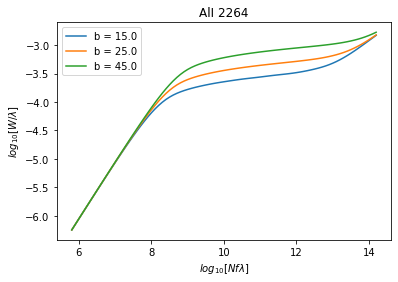

In [44]:

#Convert Angstrom to cm
plt.title(st['name'])
plt.plot(np.log10((10**Nlist)*st['fval']*st['wave']*1e-8),np.log10(Wlist/st['wave']),label='b = '+ np.str(b1))
plt.plot(np.log10((10**Nlist)*st['fval']*st['wave']*1e-8),np.log10(Wlist1/st['wave']),label='b = '+ np.str(b2))
plt.plot(np.log10((10**Nlist)*st['fval']*st['wave']*1e-8),np.log10(Wlist2/st['wave']),label='b = '+ np.str(b3))
plt.xlabel(r'$log_{10} [N f \lambda]$')
plt.ylabel(r'$log_{10} [W/ \lambda]$')

plt.legend()

In [30]:
st

{'wave': 2586.65, 'fval': 0.0684, 'name': 'FeII 2586', 'gamma': 272000000.0}

In [1]:
from rbvfit import compute_cog as c
import numpy as np
%matplotlib inline

In [2]:
Nlist=np.arange(11.5,20.,.1)
blist=np.array([15.,20.,30.,50.])
s=c.compute_cog(2586.65,Nlist,blist)

2586.65
2586.65
2586.65
2586.65


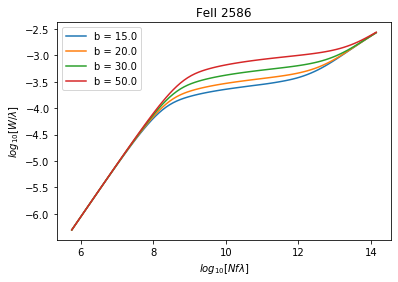

In [3]:
s.plot_cog()

In [60]:
tt

array([85,  4])

In [84]:
tt[:,0]=Wlist

In [72]:
np.shape(Wlist)

(85,)

In [82]:
np.shape(tt)

(85, 4)

In [80]:
tt[2]

IndexError: index 2 is out of bounds for axis 0 with size 2